In [18]:
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import Levenshtein

import seaborn as sns

from tqdm import tqdm
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [4]:
# Load the tile data
tile_data = pd.read_csv('../data/OrthologTilingDFwActivities_20240930.csv', index_col=0).drop_duplicates("Seq").reset_index()
ActivityThresh=  94031 # 80th percentile 20241001

In [5]:
active_tiles = tile_data[tile_data["Activity"] > ActivityThresh].drop_duplicates("Seq")

In [6]:
active_tiles = active_tiles.reset_index()

In [7]:
dist_arr_active = np.zeros((len(active_tiles), len(active_tiles)))
for i in tqdm(active_tiles.index):
    for j in range(i, max(active_tiles.index) + 1):
        dist = Levenshtein.distance(active_tiles.loc[i, "Seq"], active_tiles.loc[j, "Seq"])
        dist_arr_active[i, j] = dist
        dist_arr_active[j, i] = dist


100%|██████████| 3762/3762 [00:38<00:00, 98.55it/s] 


In [8]:
dist_arr_all = np.zeros((len(tile_data), len(tile_data)))
for i in tqdm(tile_data.index):
    for j in range(i, max(tile_data.index) + 1):
        dist = Levenshtein.distance(tile_data.loc[i, "Seq"], tile_data.loc[j, "Seq"])
        dist_arr_all[i, j] = dist
        dist_arr_all[j, i] = dist

100%|██████████| 20680/20680 [19:40<00:00, 17.51it/s] 


In [9]:
# Get upper-triangle indices, excluding diagonal
i, j = np.triu_indices_from(dist_arr_active, k=1)

# Collapse to 1D
vals_active = dist_arr_active[i, j]

In [10]:
# Get upper-triangle indices, excluding diagonal
i, j = np.triu_indices_from(dist_arr_all, k=1)

# Collapse to 1D
vals_all = dist_arr_all[i, j]

In [16]:
min(vals_active)

np.float64(1.0)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


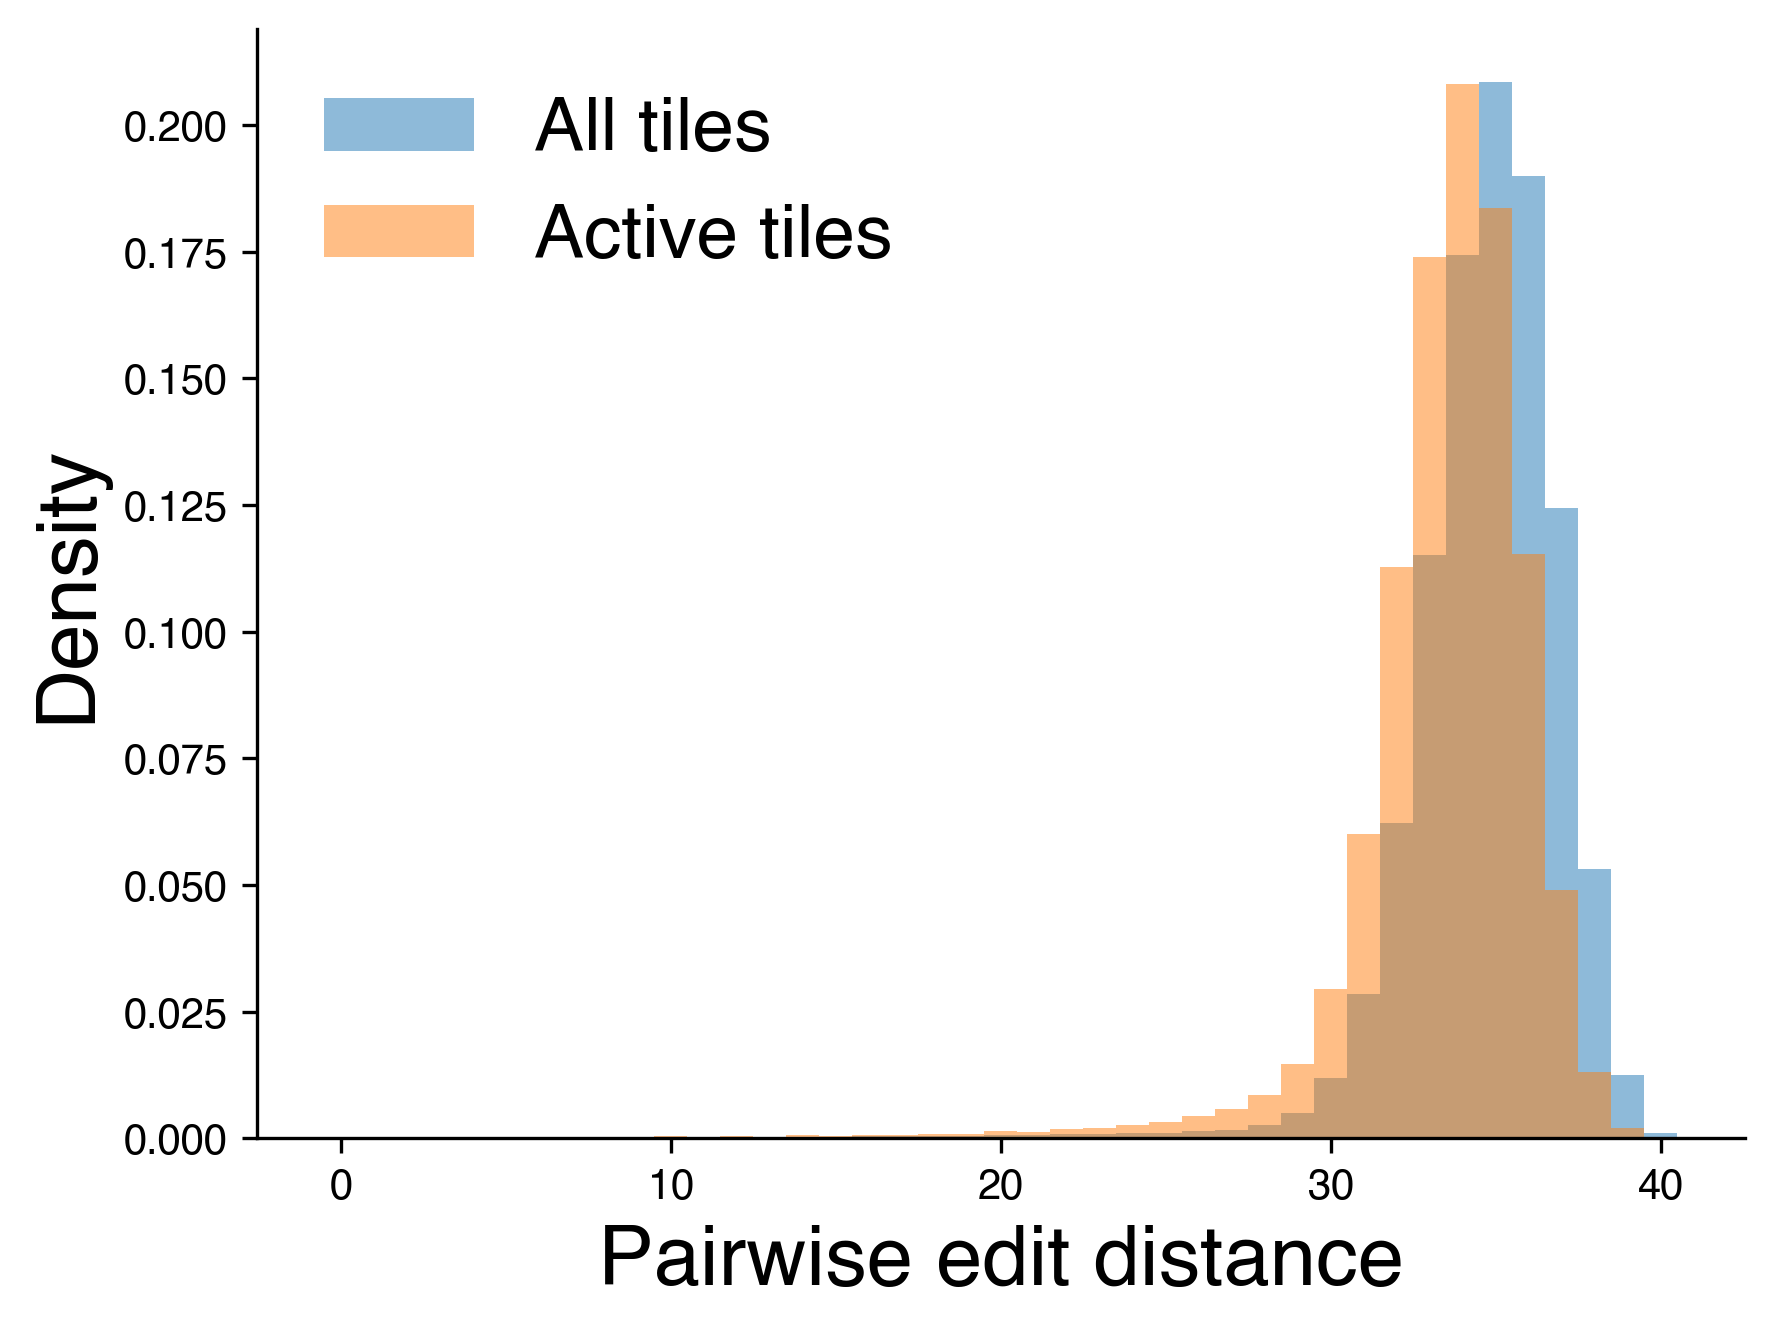

In [26]:
bins = np.arange(-0.5, 41, 1)
plt.hist(vals_all, density=True, alpha=0.5, bins=bins, label="All tiles")
plt.hist(vals_active, density=True, alpha=0.5, bins=bins, label="Active tiles")
plt.legend(frameon=False, fontsize=18)

plt.xlabel("Pairwise edit distance", fontsize=20)
plt.ylabel("Density", fontsize=20)
sns.despine()

plt.savefig("../figures/tile_diversity.pdf", format='pdf', bbox_inches='tight')